Ozone data loaded with shape: (720, 1440)


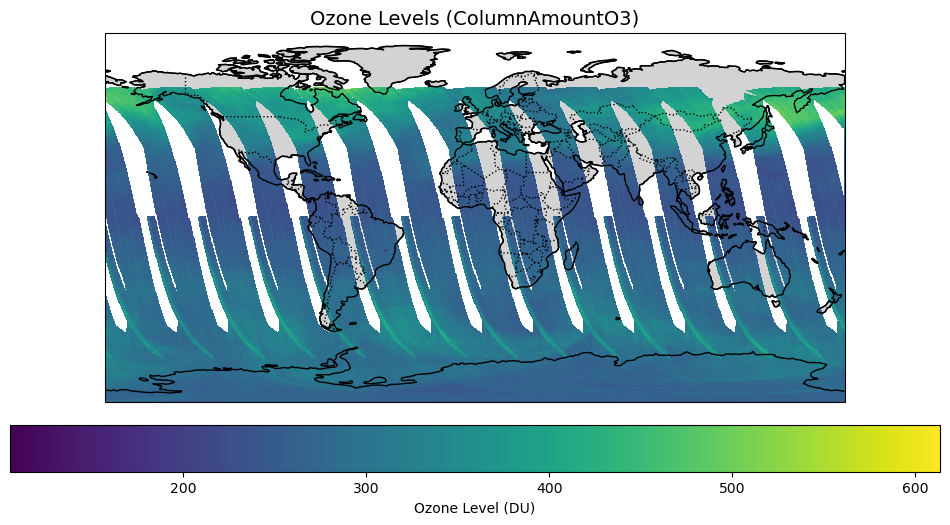

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def print_structure(name, obj):
    """Callback function to print the structure of the HDF5 file."""
    print(name)
    if isinstance(obj, h5py.Group):
        print("  [Group]")
    elif isinstance(obj, h5py.Dataset):
        print(f"  [Dataset] Shape: {obj.shape}, Data Type: {obj.dtype}")

def plot_ozone_map(ozone_data):
    """Plots the ozone data on a global map."""
    # Handle missing values (replace -9999 or similar with NaN)
    ozone_data = np.where(ozone_data < 0, np.nan, ozone_data)

    # Create latitude and longitude grids
    lons = np.linspace(-180, 180, ozone_data.shape[1])  # Longitudes
    lats = np.linspace(-90, 90, ozone_data.shape[0])    # Latitudes
    lon_grid, lat_grid = np.meshgrid(lons, lats)

    # Create the map
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("Ozone Levels (ColumnAmountO3)", fontsize=14)

    # Add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
    ax.set_global()

    # Plot the ozone data
    c = ax.pcolormesh(lon_grid, lat_grid, ozone_data, shading="auto", cmap="viridis", transform=ccrs.PlateCarree())
    
    # Add a colorbar
    cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
    cb.set_label("Ozone Level (DU)")  # Adjust based on actual units

    plt.show()
    
def main():
    file_path = "OMDOAO3e/OMI-Aura_L3-OMDOAO3e_2024m0101_v003-2024m0103t051426.he5"
    
    # Code to print the file structure
    #try:
    #    with h5py.File(file_path, "r") as file:
    #        print("HDF5 File Structure:")
    #        file.visititems(print_structure)
    #except FileNotFoundError:
    #    print(f"File not found: {file_path}")
    #except Exception as e:
    #    print(f"An error occurred: {e}")
        
    dataset_path = "HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3"

    try:
        # Read the ozone data
        with h5py.File(file_path, "r") as file:
            ozone_data = file[dataset_path][:]
            print(f"Ozone data loaded with shape: {ozone_data.shape}")

        # Plot the ozone levels
        plot_ozone_map(ozone_data)

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except KeyError:
        print(f"Dataset not found: {dataset_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()